In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("datasets/preprocessed_data.csv")
df

,Area,Annual,Mean Max. Tempearure,Mean Min. Tempearure,Yield,ADILABAD,HYDERABAD,KARIMNAGAR,KHAMMAM,MAHBUBNAGAR,...,Tapioca,Tobacco,Tomato,Turmeric,Urad,Varagu,Wheat,other fibres,other misc. pulses,other oilseeds
0,32200.0,942.16,33.250833,21.274167,34.161491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,942.16,33.250833,21.274167,269.230769,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,144900.0,942.16,33.250833,21.274167,458.937198,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5500.0,942.16,33.250833,21.274167,563.636364,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58200.0,942.16,33.250833,21.274167,541.237113,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5644,21.0,871.51,33.791667,22.709167,1428.571429,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5645,42.0,871.51,33.791667,22.709167,7761.904762,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5646,70.0,871.51,33.791667,22.709167,1957.142857,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5647,1494.0,871.51,33.791667,22.709167,406.291834,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
df= pd.read_csv("datasets/Pre-Processed Data.csv")

In [4]:
from sklearn.model_selection import train_test_split
b = df['Yield']
a = df.drop('Yield', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(a, b, test_size = 0.3, random_state = 42)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a_train = sc.fit_transform(x_train)
a_test = sc.transform(x_test)

# MODEL 1: MULTIVARIATE LINEAR REGRESSION

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

clf_linear = LinearRegression()
clf_linear.fit(a_train, y_train)
ypredlinear = clf_linear.predict(a_test)
mae_linear= metrics.mean_absolute_error(ypredlinear, y_test)
r2_linear= metrics.r2_score(ypredlinear, y_test)
print("MAE: ", mae_linear)
print("R-Squared: ", r2_linear)

MAE:  1386.1879860215465
R-Squared:  0.8998330982343927


# MODEL 2: RANDOM FOREST REGRESSOR

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(a_train, y_train)
predictions = regr.predict(a_test)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

mae_rfr= mae(predictions, y_test)
r2_rfr= r2_score(predictions, y_test)

print('MSE =', mse(predictions, y_test))
print('MAE =', mae(predictions, y_test))
print('R2 Score =', r2_score(predictions, y_test))

MSE = 24939022.556536306
MAE = 2745.9861864747504
R2 Score = 0.809084329358253


# MODEL 3: POLYNOMIAL SUPPORT VECTOR REGRESSOR (SVR)

In [8]:
from sklearn.svm import SVR
from sklearn import metrics

regressorpoly=SVR(kernel='poly',epsilon=1.0)
regressorpoly.fit(a_train, y_train)
pred=regressorpoly.predict(a_test)

mae_svm= mae(pred, y_test)
r2_svm = r2_score(y_test, pred)

print("MAE: ", mae(pred, y_test))
print("R-Squared:  ", r2_score(y_test, pred))

MAE:  3741.9947421488605
R-Squared:   -0.06086265037244143


# MAIN MODEL: ARTIFICIAL NEURAL NETWORK (ANN)

In [9]:
#First thing first- defining the function for evaluate R2 Score
import keras as K

def RSquared(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [10]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
#from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np
import warnings
from keras.callbacks import History 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [11]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = a_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error', RSquared])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12288     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.callbacks import History 
history = History()
History=NN_model.fit(a_train, y_train, epochs=50, batch_size=50, validation_split = 0.2, callbacks=[history])

Epoch 1/50
220/220 [==============================] - 1s 2ms/step - loss: 3070.9470 - mean_absolute_error: 3070.9470 - RSquared: 0.2093 - val_loss: 2038.5886 - val_mean_absolute_error: 2038.5886 - val_RSquared: 0.6482
Epoch 2/50
220/220 [==============================] - 0s 1ms/step - loss: 1352.0569 - mean_absolute_error: 1352.0568 - RSquared: 0.8230 - val_loss: 1107.5609 - val_mean_absolute_error: 1107.5609 - val_RSquared: 0.8664
Epoch 3/50
220/220 [==============================] - 0s 1ms/step - loss: 1174.9652 - mean_absolute_error: 1174.9652 - RSquared: 0.8192 - val_loss: 1165.4803 - val_mean_absolute_error: 1165.4803 - val_RSquared: 0.8593
Epoch 4/50
220/220 [==============================] - 0s 1ms/step - loss: 1142.8087 - mean_absolute_error: 1142.8087 - RSquared: 0.8252 - val_loss: 1135.1241 - val_mean_absolute_error: 1135.1241 - val_RSquared: 0.8510
Epoch 5/50
220/220 [==============================] - 0s 1ms/step - loss: 1104.0776 - mean_absolute_error: 1104.0776 - RSquared:

Epoch 39/50
220/220 [==============================] - 0s 1ms/step - loss: 942.5203 - mean_absolute_error: 942.5203 - RSquared: 0.8857 - val_loss: 1004.2421 - val_mean_absolute_error: 1004.2421 - val_RSquared: 0.8720
Epoch 40/50
220/220 [==============================] - 0s 1ms/step - loss: 941.6032 - mean_absolute_error: 941.6032 - RSquared: 0.8742 - val_loss: 1010.1718 - val_mean_absolute_error: 1010.1718 - val_RSquared: 0.8650
Epoch 41/50
220/220 [==============================] - 0s 1ms/step - loss: 935.5968 - mean_absolute_error: 935.5968 - RSquared: 0.8583 - val_loss: 1002.7388 - val_mean_absolute_error: 1002.7388 - val_RSquared: 0.8636
Epoch 42/50
220/220 [==============================] - 0s 1ms/step - loss: 940.7305 - mean_absolute_error: 940.7305 - RSquared: 0.8802 - val_loss: 1021.5785 - val_mean_absolute_error: 1021.5785 - val_RSquared: 0.8692
Epoch 43/50
220/220 [==============================] - 0s 1ms/step - loss: 930.0521 - mean_absolute_error: 930.0521 - RSquared: 0.86

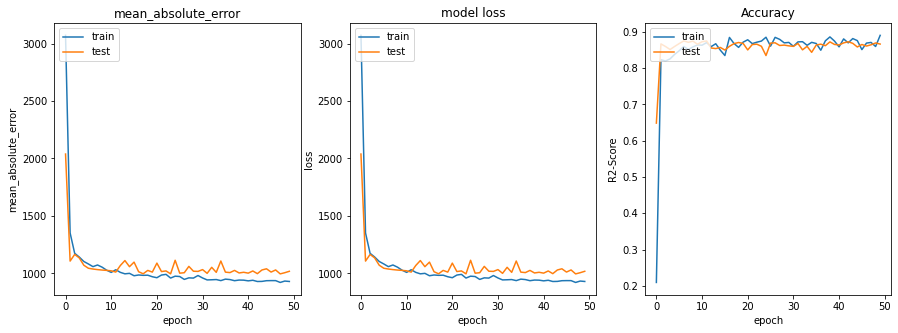

In [13]:
mae_ann= History.history['mean_absolute_error']
val_mae_ann= History.history['val_mean_absolute_error']
loss_ann=History.history['loss']
val_loss=History.history['val_loss']
r2_ann= History.history['RSquared']
val_r2_ann= History.history['val_RSquared']

from matplotlib.pyplot import figure

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)  

plt.subplot(1, 3, 1)
plt.plot(History.history['mean_absolute_error'])
plt.plot(History.history['val_mean_absolute_error'])
#figure(figsize(8,8))
plt.title('mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
  
plt.subplot(1, 3, 3)
plt.plot(History.history['RSquared'])
plt.plot(History.history['val_RSquared'])
plt.title('Accuracy')
plt.ylabel('R2-Score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.show()
  

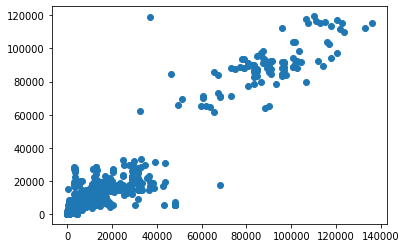

In [14]:
predictions=NN_model.predict(a_test)
plt.scatter(y_test,predictions)

<AxesSubplot:ylabel='Density'>

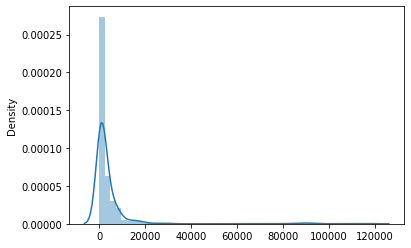

In [15]:
sb.distplot(predictions)

# MODEL COMPARISON

In [16]:
mean_list= [ mae_rfr, mae_ann[-1], mae_svm, mae_linear]
accuracy_list= [r2_rfr, val_r2_ann[-1], r2_svm, r2_linear]
name = ['Random Forest', 'ANN','SVM', 'Linear Regression']

Text(0.5, 1.0, 'Accuracy Comparison')

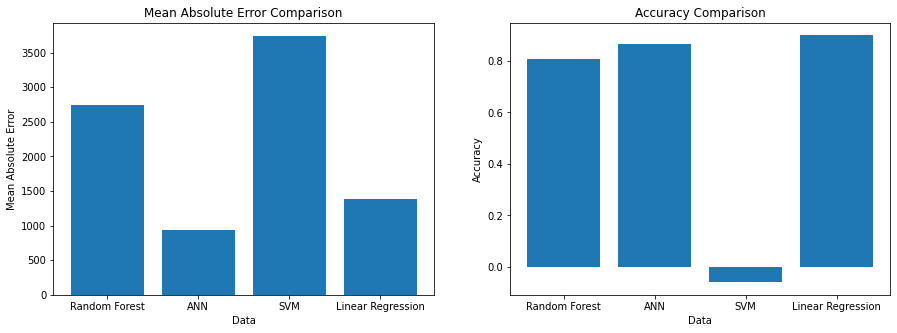

In [17]:
f1 = plt.figure()
f1.set_figwidth(15)
f1.set_figheight(5) 

plt.subplot(1, 2, 1)
plt.bar(name,mean_list)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")
plt.title('Mean Absolute Error Comparison')

plt.subplot(1, 2, 2)
plt.bar(name,accuracy_list)
plt.xlabel("Data")
plt.ylabel("Accuracy")
plt.title('Accuracy Comparison')